In [1]:
import quaternion
import numpy as np
import shapely
from shapely.geometry import Polygon

/Users/reona/workspace_local/randoor/.venv/lib/python2.7/site-packages/quaternion/numba_wrapper.py:20: UserWarning: 

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Could not import from numba, which means that some
parts of this code may run MUCH more slowly.  You
may wish to install numba.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  warnings.warn(warning_text)


In [2]:
from randoor import utils

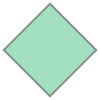

In [3]:
points = utils.get_square_horizon((0,0), 1, np.pi/4)
Polygon(points)

In [4]:
utils.add_dimension(np.arange(9).reshape((3,3)), 0)

array([[0, 1, 2, 0],
       [3, 4, 5, 0],
       [6, 7, 8, 0]])

In [5]:
from randoor.spawner import poly

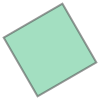

In [6]:
area_points = utils.get_square_horizon((0,0), 10, np.pi/6)
area_poly = Polygon(area_points)
area_poly

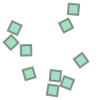

In [7]:
from shapely.ops import unary_union
xy, yaw, polys = poly.sprinkle_cube(area_poly, 10, 2)
mulp = unary_union(polys)
mulp

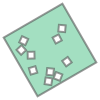

In [8]:
Polygon(area_points, [p.exterior.coords for p in mulp.geoms])

In [9]:
from sklearn.cluster import DBSCAN
eps = 3
points = np.array([p.centroid.coords[0] for p in polys])
db = DBSCAN(eps=eps, min_samples=1).fit(points)
db.labels_

array([0, 1, 2, 3, 4, 5, 3, 6, 3, 5])

In [10]:
from trimesh.convex import hull_points
hull_points(polys[0].exterior.coords)

array([[-4.32134194, -4.78277688],
       [-6.23948372, -5.34910904],
       [-5.67315156, -7.26725082],
       [-3.75500979, -6.70091866]])

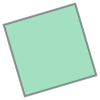

In [11]:
pp = np.array(polys)
hpoints = np.concatenate([p.exterior.coords for p in pp[db.labels_==0]])
hull = hull_points(hpoints)
Polygon(hull)

In [12]:
from trimesh.path.polygons import sample
face_size = 0.001
factor = 1 / face_size
face = Polygon(area_poly.buffer(face_size).exterior.coords, [area_poly.exterior.coords])
sample(face, 2, factor=factor)

array([[10.11400047,  2.48229861]])

In [13]:
from randoor.spawner import geom
geom.sample_from_faces([area_poly], 5, face_size)

array([[[ -9.15073217,   6.26420034],
        [ -8.68798303,   6.53153687],
        [-10.74850985,  -1.38501593],
        [ 12.66201357,  -4.23694432],
        [  4.54232428,  12.13307422]]])

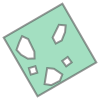

In [14]:
zone_polys, zone_hull = poly.get_clustered_zones(polys, 4)
free_zone = Polygon(area_poly.exterior.coords, [p.exterior.coords for p in zone_hull])
free_zone

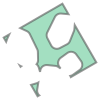

In [15]:
pat = 1.6
keyarea_range = 0.3

path_area = free_zone.buffer(-pat)
path_area

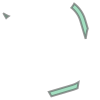

In [16]:
path_area.intersection(zone_hull[0].buffer(pat+keyarea_range))

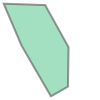

In [17]:
wall = poly.random_triangulation()
wall

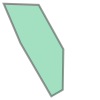

In [18]:
Polygon(wall.exterior.buffer(1).interiors[0])

In [19]:
from randoor.generator import empty_room
generator = empty_room.EmptyRoomGenerator(9, 0.05)
config = generator.generate_new()

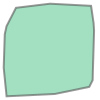

In [20]:
config.get_freespace_poly()

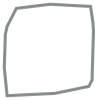

In [21]:
config.get_collision_poly()